In [1]:
import os 

In [2]:
data_dir = 'E:\dogsvcats\cats_and_dogs_filtered'


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
train_path = data_dir + "\\train\\"
test_path = data_dir +"\\validation\\"
os.listdir(train_path)

['cats', 'dogs']

In [5]:
os.listdir(train_path + "\\cats\\")[0]
cat_img = imread(train_path + "\\cats\\" + os.listdir(train_path + "\\cats\\")[0])

In [6]:
cat_img.shape

(374, 500, 3)

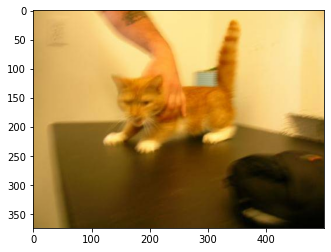

In [7]:
plt.imshow(cat_img)

In [8]:
dog_img = imread(train_path + "\\dogs\\" + os.listdir(train_path+"\\dogs\\")[0])

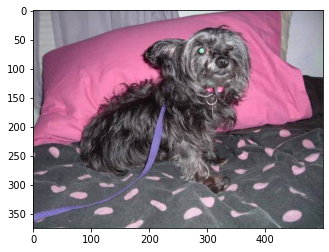

In [9]:
plt.imshow(dog_img)

In [10]:
len(os.listdir(train_path+"\\dogs\\")) == len(os.listdir(train_path+"\\cats\\"))


True

In [11]:
dim1 = []
dim2 = []
for image in os.listdir(train_path+"\\cats\\"):
    d1,d2,colors = imread((train_path+"\\cats\\")+image).shape
    dim1.append(d1)
    dim2.append(d2)


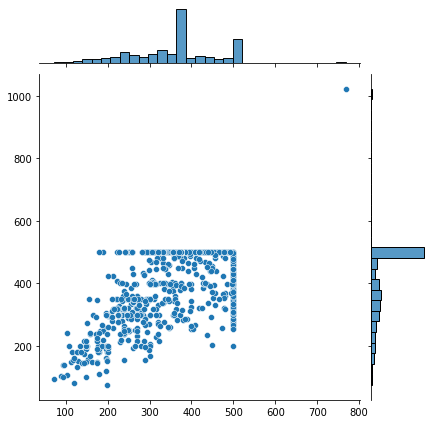

In [12]:
sns.jointplot(x=dim1,y=dim2)

In [13]:
x_size = np.mean(dim1)
y_size = np.mean(dim2)


In [14]:
y_size

x_size

354.542

In [15]:
image_shape_size = (350,350,3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

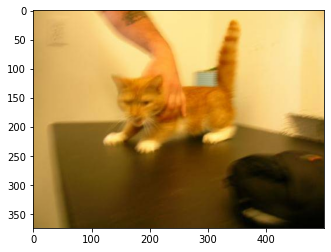

In [18]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.05,height_shift_range=0.05,rescale=1/255,shear_range=0.1)

plt.imshow(cat_img)
random_cat = image_gen.random_transform(cat_img)


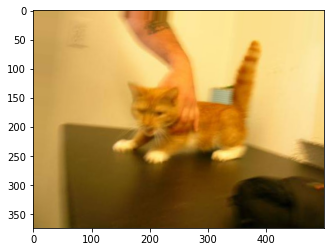

In [19]:
plt.imshow(random_cat)

In [20]:
image_gen.flow_from_directory(train_path)

Found 2000 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten


In [22]:
model = Sequential()



In [23]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape_size , activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape_size , activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape_size , activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0

In [24]:
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
batch_size = 16

In [27]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape_size[:2],color_mode='rgb',class_mode='binary')

Found 2000 images belonging to 2 classes.


In [28]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape_size[:2],color_mode='rgb',class_mode='binary',shuffle=False)

Found 1000 images belonging to 2 classes.


In [ ]:
results = model.fit_generator(train_image_gen,epochs = 20, validation_data = test_image_gen, callbacks=[early_stop])

C:\Temp\ipykernel_17560\522744185.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs = 20, validation_data = test_image_gen, callbacks=[early_stop])


Epoch 1/20


In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())